# Housing Price Prediction: King County Dataset 🏡

This project was completed as part of a Data Analysis course on Coursera. The goal is to predict housing prices using various features such as square footage, number of bedrooms, number of floors, etc.

The dataset contains housing sale prices for King County, including Seattle. It includes homes sold between May 2014 and May 2015.

## Tools Used
- Python
- Pandas, NumPy
- Seaborn, Matplotlib
- Scikit-learn

---


### Question 1
Display the data types of each column.

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Load the dataset directly
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(url)

# Suppress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Display data types
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


### Question 2
Drop 'id' and 'Unnamed: 0', then display statistics.

In [3]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Question 3
Count the number of houses with unique floor values.

In [4]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


### Question 4
Boxplot for price vs. waterfront.

<Axes: xlabel='waterfront', ylabel='price'>

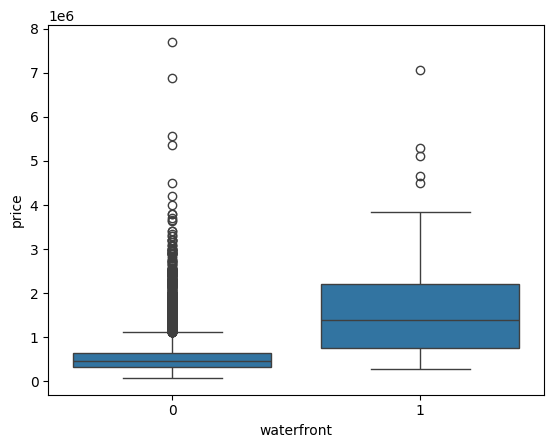

In [5]:
import seaborn as sns
sns.boxplot(x='waterfront', y='price', data=df)

### Question 5
Regplot: sqft_above vs. price.

<Axes: xlabel='sqft_above', ylabel='price'>

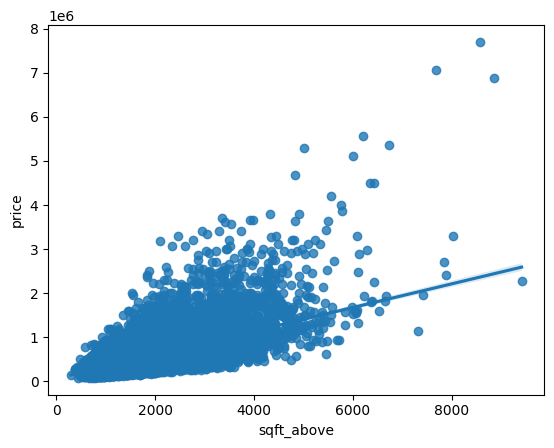

In [6]:
import seaborn as sns
sns.regplot(x='sqft_above', y='price', data=df)

### Question 6
Linear Regression: sqft_living vs. price.

In [7]:
from sklearn.linear_model import LinearRegression
X = df[['sqft_living']]
y = df['price']
model = LinearRegression()
model.fit(X, y)
r2 = model.score(X, y)
r2

0.4928532179037931

### Question 7
Linear Regression with multiple features.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features])
y = df['price']
model = LinearRegression()
model.fit(X, y)
r2 = model.score(X, y)
r2

0.6576951666037498

### Question 8
Pipeline with polynomial features and regression.

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())])
X = df[features]
y = df['price']
pipeline.fit(X, y)
r2 = pipeline.score(X, y)
r2

0.7513408515988734

### Question 9
Ridge Regression (alpha=0.1) with test set.

In [10]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
r2 = ridge.score(x_test, y_test)
r2

0.647876234945199

### Question 10
Polynomial Ridge Regression (degree=2, alpha=0.1).

In [11]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Original code
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Create and fit Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
r2 = ridge.score(x_test, y_test)
print(f"Original Ridge Regression R^2: {r2:.4f}")

# Second order polynomial transform implementation
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Create and fit Ridge regression with polynomial features
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(x_train_poly, y_train)
y_pred_poly = ridge_poly.predict(x_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f"Polynomial Ridge Regression R^2: {r2_poly:.4f}")

Original Ridge Regression R^2: 0.6479
Polynomial Ridge Regression R^2: 0.7003
